# Task 2: Analysis for trail store

In [2]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

In [3]:
qvi_data = pd.read_csv('QVI_data.csv')
qvi_data.head(10)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
5,1005,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream
6,1007,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget
7,1007,2018-12-05,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Budget
8,1009,2018-11-20,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,DORITOS,NEW FAMILIES,Premium
9,1010,2018-09-09,1,10,51,Doritos Mexicana 170g,2,8.8,170,DORITOS,YOUNG SINGLES/COUPLES,Mainstream


In [3]:
qvi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [4]:
qvi_data.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [6]:
qvi_data.duplicated().sum()

1

In [7]:
# we can drop this duplicate value as we have seen it in task 1
qvi_data.drop_duplicates(inplace=True)

In [8]:
qvi_data.duplicated().sum()

0

In [9]:
qvi_data.shape

(264833, 12)

#### For each month and store, we ve to calculate:

1. Total sales
2. Number of customers
3. Transaction per customer
4. Chips per transaction
5. Average price per unit
6. Create individual dataframe and then concatenate all of them together at the end.

In [9]:
#Monthly sales by each store

# Extract year month from dataset

qvi_data['YEARMONTH'] = [''.join(x.split('-')[0:2]) for x in qvi_data.DATE]
qvi_data['YEARMONTH'] = pd.to_numeric(qvi_data['YEARMONTH'])
qvi_data['YEARMONTH'].head(5)

0    201810
1    201809
2    201903
3    201903
4    201811
Name: YEARMONTH, dtype: int64

In [11]:
mon_tot_sales = qvi_data.groupby(['STORE_NBR', 'YEARMONTH']).TOT_SALES.sum()
mon_tot_sales.head(5)

STORE_NBR  YEARMONTH
1          201807       206.9
           201808       176.1
           201809       278.8
           201810       188.1
           201811       192.6
Name: TOT_SALES, dtype: float64

In [13]:
# Monthly customers per stores
# we can do this by counting loyalty card numbers making transaction each month

num_cust = qvi_data.groupby(['STORE_NBR', 'YEARMONTH']).LYLTY_CARD_NBR.nunique()
num_cust

STORE_NBR  YEARMONTH
1          201807       49
           201808       42
           201809       59
           201810       44
           201811       46
                        ..
272        201902       45
           201903       50
           201904       54
           201905       34
           201906       34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64

In [14]:
# Monthly transaction made by each customers
# we can do this by dividing transaction by loyalty card number

num_tran_cust = qvi_data.groupby(['STORE_NBR', 'YEARMONTH']).TXN_ID.nunique() / qvi_data.groupby(['STORE_NBR', 'YEARMONTH']).LYLTY_CARD_NBR.nunique()
num_tran_cust.head(58)

STORE_NBR  YEARMONTH
1          201807       1.061224
           201808       1.023810
           201809       1.050847
           201810       1.022727
           201811       1.021739
           201812       1.119048
           201901       1.028571
           201902       1.057692
           201903       1.088889
           201904       1.023810
           201905       1.108696
           201906       1.000000
2          201807       1.051282
           201808       1.102564
           201809       1.027778
           201810       1.048780
           201811       1.025641
           201812       1.057143
           201901       1.046512
           201902       1.103448
           201903       1.069767
           201904       1.042553
           201905       1.041667
           201906       1.050000
3          201807       1.232143
           201808       1.169643
           201809       1.166667
           201810       1.144231
           201811       1.168317
           201812     

In [15]:
# Since we are interrested in sales of chips we need to see how many customers bought chips per transactions
# we can do this by sum of product quantities and =then divide by number of transactions

num_chips_per_txn = qvi_data.groupby(['STORE_NBR', 'YEARMONTH']).PROD_QTY.sum() / qvi_data.groupby(['STORE_NBR', 'YEARMONTH']).TXN_ID.nunique()
num_chips_per_txn

STORE_NBR  YEARMONTH
1          201807       1.192308
           201808       1.255814
           201809       1.209677
           201810       1.288889
           201811       1.212766
                          ...   
272        201902       1.895833
           201903       1.905660
           201904       1.909091
           201905       1.775000
           201906       1.891892
Length: 3169, dtype: float64

In [16]:
# Average price per unit = sum of total sales / sum of product quantity

avg_price_per_unit = qvi_data.groupby(['STORE_NBR', 'YEARMONTH']).TOT_SALES.sum() / qvi_data.groupby(['STORE_NBR', 'YEARMONTH']).PROD_QTY.sum()
avg_price_per_unit.head(5)

STORE_NBR  YEARMONTH
1          201807       3.337097
           201808       3.261111
           201809       3.717333
           201810       3.243103
           201811       3.378947
dtype: float64

In [24]:
# Lets concatenate above coloumns into 'MonthlySalesPerStore' dataframe

df = [mon_tot_sales, num_cust, num_tran_cust, num_chips_per_txn, avg_price_per_unit]
MonthlySalesPerStore = pd.concat(df, join = 'outer', axis = 1)
MonthlySalesPerStore.rename(columns = {'TOTAL_SALES': 'mon_tot_sales', 'LYLTY_CARD_NBR': 'num_cust', 0: 'num_tran_cust', 1: 'num_chips_per_txn', 2: 'avg_price_per_unit'}, inplace= True)
MonthlySalesPerStore

TOT_SALES  num_cust  num_tran_cust  num_chips_per_txn  \
STORE_NBR YEARMONTH                                                          
1         201807         206.9        49       1.061224           1.192308   
          201808         176.1        42       1.023810           1.255814   
          201809         278.8        59       1.050847           1.209677   
          201810         188.1        44       1.022727           1.288889   
          201811         192.6        46       1.021739           1.212766   
...                        ...       ...            ...                ...   
272       201902         395.5        45       1.066667           1.895833   
          201903         442.3        50       1.060000           1.905660   
          201904         445.1        54       1.018519           1.909091   
          201905         314.6        34       1.176471           1.775000   
          201906         312.1        34       1.088235           1.891892   

                     avg_price_per_unit  
STORE_NBR YEARMONTH                      
1         201807               3.337097  
          201808               3.261111  
          201809               3.717333  
          201810               3.243103  
          201811               3.378947  
...                                 ...  
272       201902               4.346154  
          201903               4.379208  
          201904               4.239048  
          201905               4.430986  
          201906               4.458571  

[3169 rows x 5 columns]

In [25]:
MonthlySalesPerStore.reset_index(inplace= True)
MonthlySalesPerStore.head(5)

,STORE_NBR,YEARMONTH,TOT_SALES,num_cust,num_tran_cust,num_chips_per_txn,avg_price_per_unit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [26]:
MonthlySalesPerStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STORE_NBR           3169 non-null   int64  
 1   YEARMONTH           3169 non-null   int64  
 2   TOT_SALES           3169 non-null   float64
 3   num_cust            3169 non-null   int64  
 4   num_tran_cust       3169 non-null   float64
 5   num_chips_per_txn   3169 non-null   float64
 6   avg_price_per_unit  3169 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 173.4 KB


In [27]:
MonthlySalesPerStore.duplicated().sum()

0

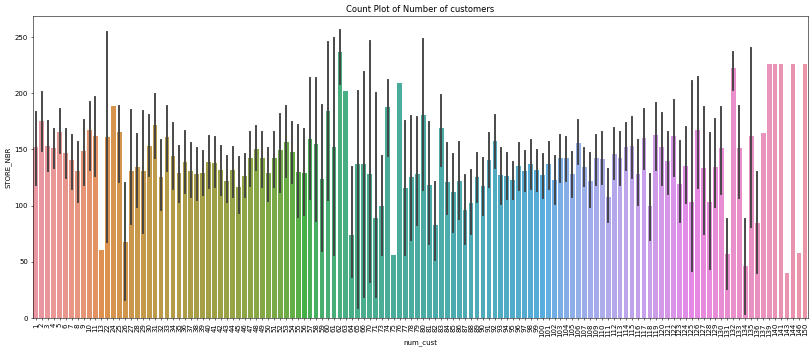

In [ ]:
plt.figure(figsize = (20,8), dpi = 50)
plt.xticks(rotation = 90)
sea.barplot(x = 'num_cust', y = 'STORE_NBR' , data = MonthlySalesPerStore)
plt.title('Count Plot of Number of customers')
plt.show()

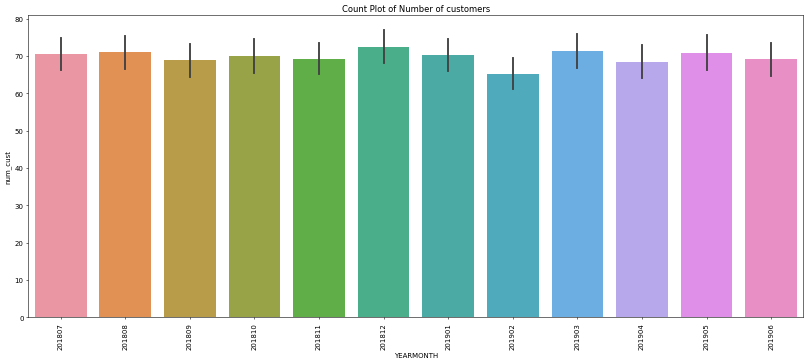

In [51]:
plt.figure(figsize = (20,8), dpi = 50)
plt.xticks(rotation = 90)
sea.barplot(x = 'YEARMONTH', y = 'num_cust' , data = MonthlySalesPerStore)
plt.title('Count Plot of Number of customers in each month')
plt.show()

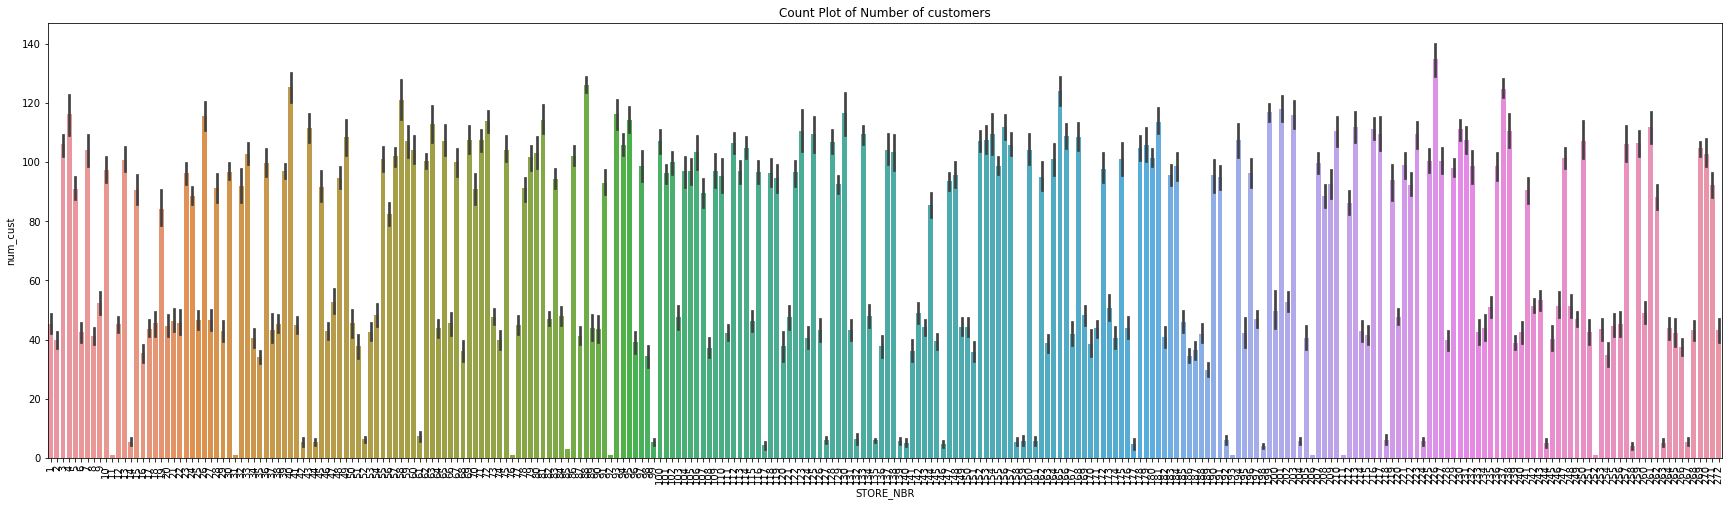

In [66]:
plt.figure(figsize = (30,8), dpi = 50)
plt.xticks(rotation = 90)
sea.barplot(x = 'STORE_NBR', y = 'num_cust' , data = MonthlySalesPerStore)
plt.title('Count Plot of Number of customers in each store')
plt.show()

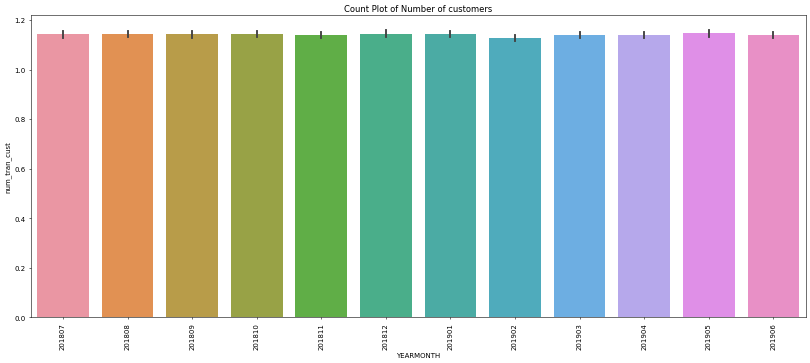

In [53]:
plt.figure(figsize = (20,8), dpi = 50)
plt.xticks(rotation = 90)
sea.barplot(y = 'num_tran_cust', x = 'YEARMONTH' , data = MonthlySalesPerStore)
plt.title('Count Plot of Number of customers')
plt.show()

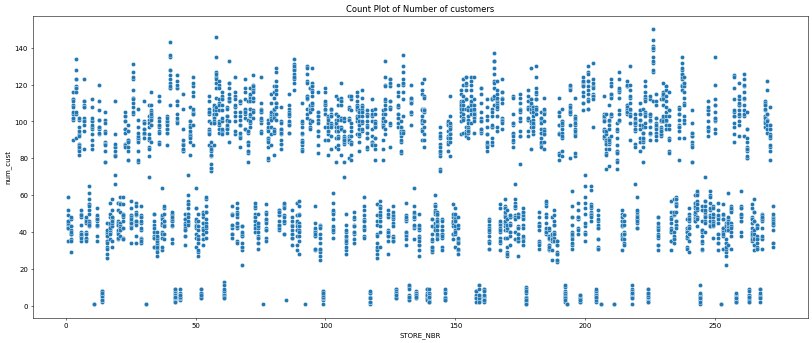

In [39]:
plt.figure(figsize = (20,8), dpi = 50)
# plt.xticks(rotation = 90)
sea.scatterplot(y = 'num_cust', x = 'STORE_NBR' , data = MonthlySalesPerStore)
plt.title('Count Plot of Number of customers')
plt.show()

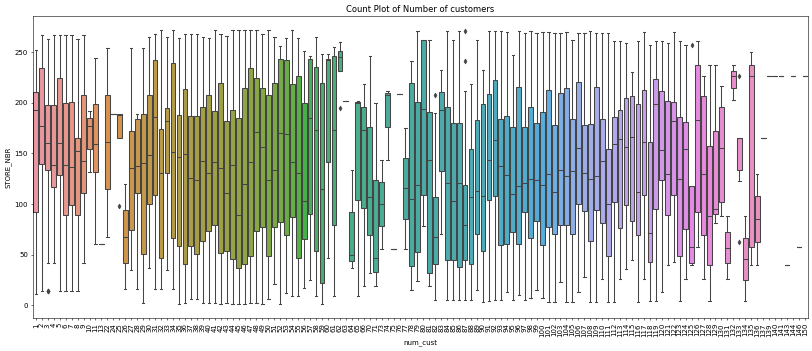

In [40]:
plt.figure(figsize = (20,8), dpi = 50)
plt.xticks(rotation = 90)
sea.boxplot(x = 'num_cust', y = 'STORE_NBR' , data = MonthlySalesPerStore)
plt.title('Count Plot of Number of customers')
plt.show()

chips

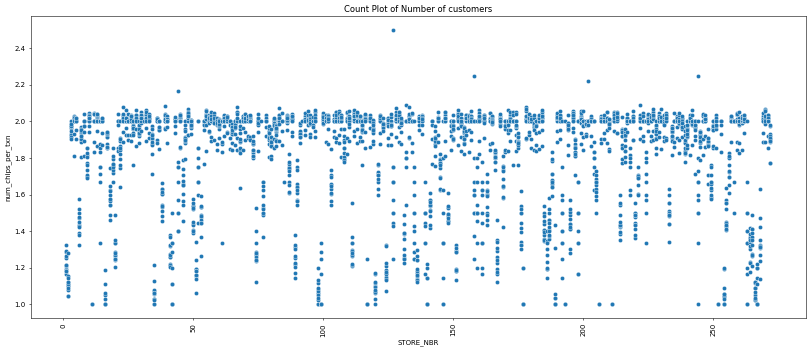

In [43]:
plt.figure(figsize = (20,8), dpi = 50)
plt.xticks(rotation = 90)
sea.scatterplot(y = 'num_chips_per_txn', x = 'STORE_NBR' , data = MonthlySalesPerStore)
plt.title('Count Plot of Number of customers')
plt.show()

In [48]:
MonthlySalesPerStore.describe()

,STORE_NBR,YEARMONTH,TOT_SALES,num_cust,num_tran_cust,num_chips_per_txn,avg_price_per_unit
count,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000
mean,136.802461,201856.483749,610.007889,69.826128,1.141307,1.813254,3.805827
std,78.418604,47.040465,389.699478,36.817352,0.111341,0.295347,0.494938
min,1.000000,201807.000000,1.500000,1.000000,1.000000,1.000000,1.500000
25%,68.000000,201809.000000,260.000000,41.000000,1.041667,1.696429,3.447368
50%,137.000000,201812.000000,674.600000,79.000000,1.125000,1.974790,3.589524
75%,204.000000,201903.000000,928.200000,102.000000,1.233645,2.000000,4.365546
max,272.000000,201906.000000,1659.600000,150.000000,1.468085,2.500000,5.350000


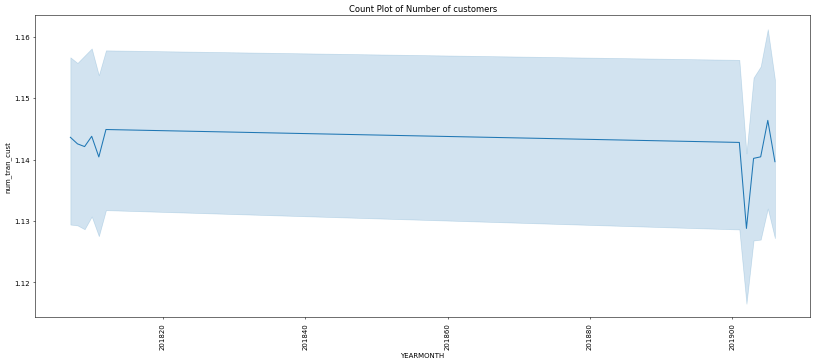

In [61]:
plt.figure(figsize = (20,8), dpi = 50)
plt.xticks(rotation = 90)
sea.lineplot(y = 'num_tran_cust', x = 'YEARMONTH' , data = MonthlySalesPerStore)
plt.title('Count Plot of Number of customers')
plt.show()

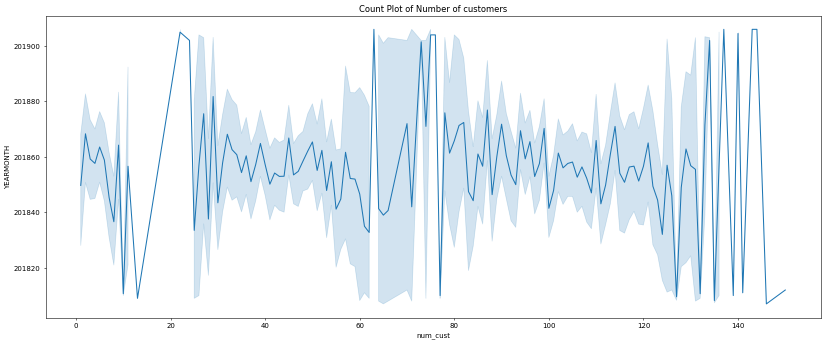

In [64]:
plt.figure(figsize = (20,8), dpi = 50)
sea.lineplot(x = 'num_cust', y = 'YEARMONTH' , data = MonthlySalesPerStore)
plt.title('Count Plot of Number of customers')
plt.show()

# Conclusion for task 2:
1. From above graphs we can conclude number of customers are on average were high for initial time period in trial store 88 & 86.
2. Over all we can observe sales increased during the trail period .
